# Portfolio 3 project:  `A Comprehensive Diabetes Prediction - Regression`

Part of Purwadhika Digital Technology portfolio created by Rizan Pradiya and Yonathan Hary Hutagalung

# 1. Importing Libraries and set random state

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import time
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import shap
import pickle

# 2. Loading dataset

In [227]:
df = pd.read_csv('Diabetes_Data.csv')

In [228]:
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (10000, 11)
Total rows: 10000
Total columns: 11


In [229]:
df.head()

,age,gender,bmi,bmi_category,systolic,diastolic,blood_pressure_category,cholesterol,cholesterol_category,glucose,diabetes_probability
0,55,Female,29.59,Overweight,112.0,89.5,Hypertension Stage 1,247,High,139,0.65
1,34,Male,30.68,Obesity,106.0,115.0,Hypertension Stage 2,255,High,101,0.60
2,26,Male,15.96,Underweight,96.0,97.0,Hypertension Stage 2,234,Borderline high,97,0.15
3,63,Male,15.61,Underweight,109.6,115.3,Hypertension Stage 2,261,High,143,0.70
4,37,Male,41.54,Obesity,110.0,103.0,Hypertension Stage 2,226,Borderline high,115,0.50


# 3. Introduction and Business Context

**3A. CONTEXT**
- Diabetes is a chronic disease affecting millions globally
- Medical indicators (BMI, blood pressure, glucose) are strong predictors
- Dataset: 25,000 simulated observations with 11 medical features
- Time period: Simulated health data for educational purposes
    
**3B. BUSINESS PROBLEM:**
- Healthcare providers need to quantify diabetes risk probability
- Current diabetes_probability is calculated but not optimized
- Build regression model to predict continuous diabetes probability
- Enable early intervention strategies for high-risk patients
    
**3C. PROJECT GOALS:**
1. Develop accurate regression model for diabetes probability prediction
2. Identify key medical indicators influencing diabetes risk
3. Create interpretable model for clinical decision-making
4. Deploy model for real-time risk assessment
    
**3D. ANALYTICAL APPROACH:**
- Step 1: Exploratory Data Analysis (EDA)
- Step 2: Feature Engineering & Preprocessing
- Step 3: Model Benchmarking (7+ algorithms)
- Step 4: Hyperparameter Tuning
- Step 5: Model Validation & Interpretation
- Step 6: Streamlit Deployment
    
**3E. STAKEHOLDERS:**
- Healthcare providers (users) - need accurate predictions
- Insurance companies (investors) - want risk quantification
- Patients (end-users) - need preventive guidance
    
**3F. METRIC SELECTION:**
- Primary: R² Score (model explains variance in diabetes probability)
- Secondary: Mean Absolute Percentage Error (MAPE) - interpretable
- Tertiary: Mean Absolute Error (MAE) - actual error magnitude
- Monitoring: Residual distribution (check for bias)
    
**3G. 5-POINT BUSINESS ML GOALS:**
- Problem: Healthcare providers lack accurate diabetes risk quantification
- Data: 10,000 statistically ggenerated medical records with proven predictive features
- ML Objective: Regression model achieving R² ≥ 0.85 on test set
- Action: Deploy model in Streamlit app for real-time prediction
- Value: Enable early intervention, reduce healthcare costs, improve outcomes

# 4. Data Understanding and EDA

## 4.1 Data Dictionary

In [230]:
df.dtypes

age                          int64
gender                      object
bmi                        float64
bmi_category                object
systolic                   float64
diastolic                  float64
blood_pressure_category     object
cholesterol                  int64
cholesterol_category        object
glucose                      int64
diabetes_probability       float64
dtype: object

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      10000 non-null  int64  
 1   gender                   10000 non-null  object 
 2   bmi                      10000 non-null  float64
 3   bmi_category             10000 non-null  object 
 4   systolic                 10000 non-null  float64
 5   diastolic                10000 non-null  float64
 6   blood_pressure_category  10000 non-null  object 
 7   cholesterol              10000 non-null  int64  
 8   cholesterol_category     10000 non-null  object 
 9   glucose                  10000 non-null  int64  
 10  diabetes_probability     10000 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB


In [232]:
df. describe()

,age,bmi,systolic,diastolic,cholesterol,glucose,diabetes_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.062300,26.309132,106.052700,95.717600,228.748600,120.525300,0.489040
std,21.058294,8.396257,7.207495,17.863035,35.667787,21.095224,0.231504
min,18.000000,11.080000,90.000000,60.000000,150.000000,70.000000,0.000000
25%,36.000000,19.870000,100.600000,80.400000,202.000000,105.000000,0.300000
50%,55.000000,25.095000,106.000000,95.700000,229.000000,121.000000,0.500000
75%,72.000000,31.382500,111.400000,111.000000,255.000000,136.000000,0.650000
max,90.000000,53.210000,125.000000,132.000000,300.000000,182.000000,0.900000


In [233]:
df.isnull().sum()

age                        0
gender                     0
bmi                        0
bmi_category               0
systolic                   0
diastolic                  0
blood_pressure_category    0
cholesterol                0
cholesterol_category       0
glucose                    0
diabetes_probability       0
dtype: int64

In [234]:
df.duplicated().sum()

np.int64(0)

## 4.2 Explanatory Data Analysis

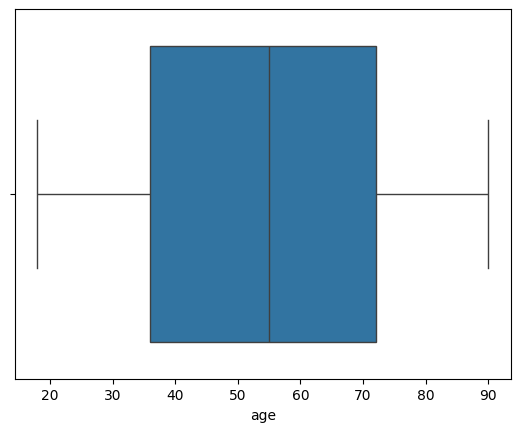

In [235]:
sns.boxplot(data=df, x='age')
plt.show()

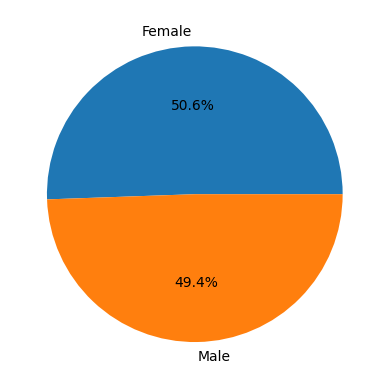

In [236]:
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.show()

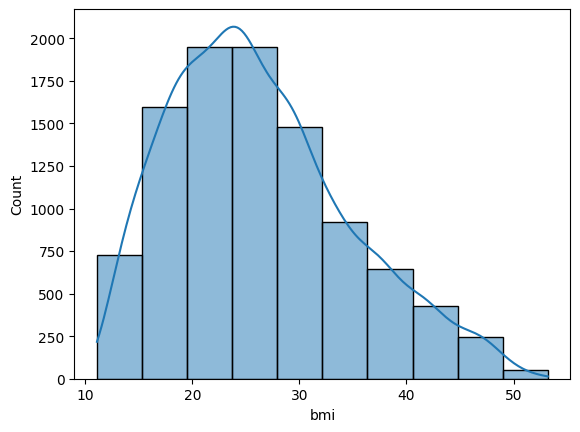

In [237]:
sns.histplot(data=df, x='bmi', kde=True, bins=10)
plt.show()

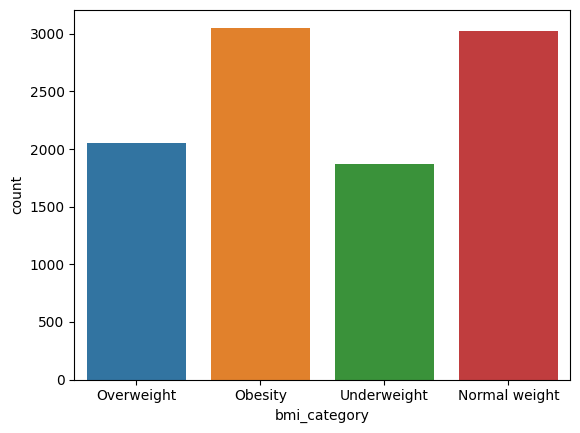

In [238]:
sns.countplot(data=df, x='bmi_category', hue='bmi_category')
plt.show()

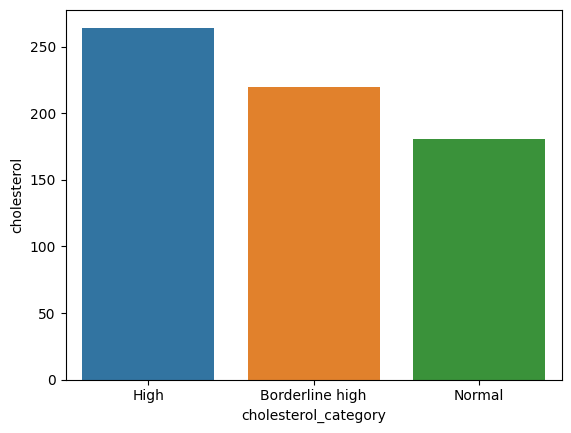

In [239]:
sns.barplot(data=df, x='cholesterol_category', y='cholesterol', ci=None,hue='cholesterol_category')
plt.show()

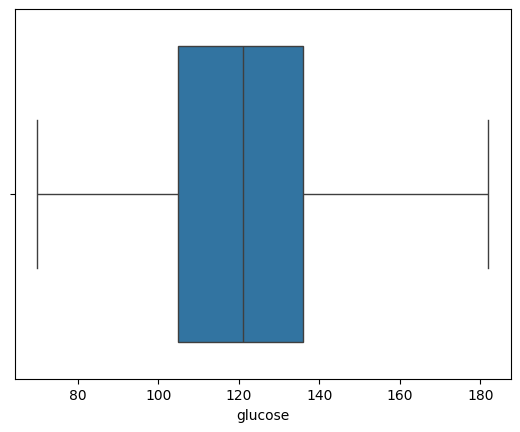

In [240]:
sns.boxplot(data=df, x='glucose')
plt.show()

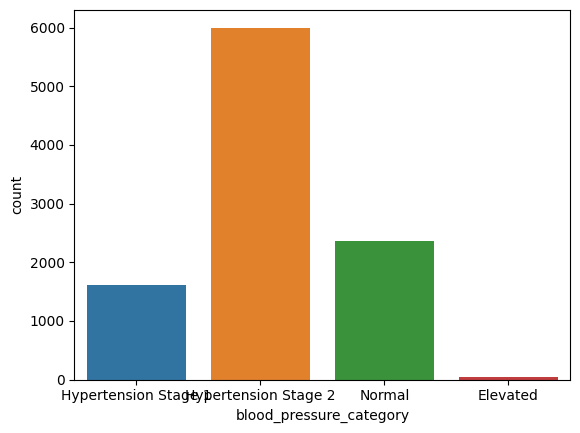

In [241]:
sns.countplot(data=df, x='blood_pressure_category', hue='blood_pressure_category')
plt.show()

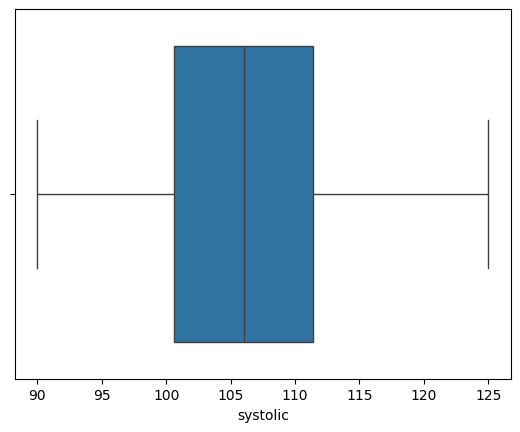

In [242]:
sns.boxplot(data=df, x='systolic')
plt.show()

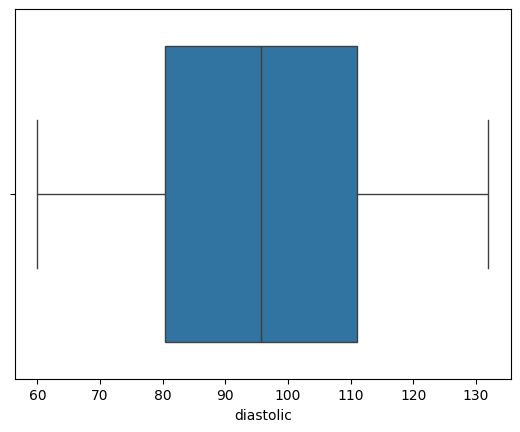

In [243]:
sns.boxplot(data=df, x='diastolic')
plt.show()

## 4.3 Target Variable Analysis

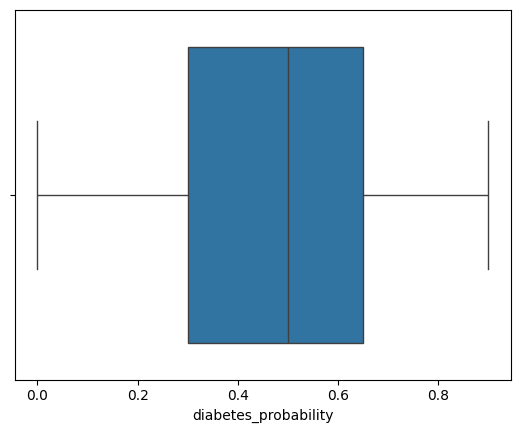

In [244]:
sns.boxplot(data=df, x='diabetes_probability')
plt.show()

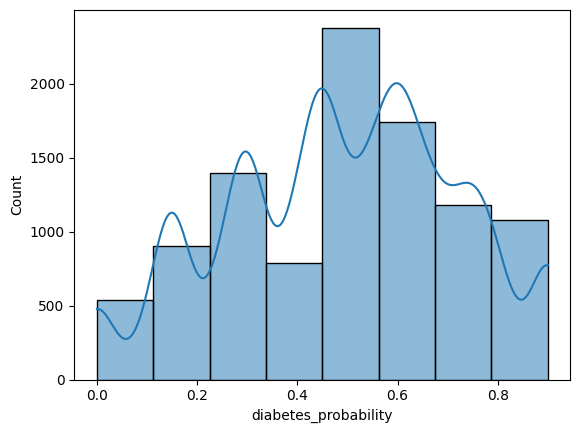

In [245]:
sns.histplot(data=df, x='diabetes_probability', kde=True, bins=8)
plt.show()

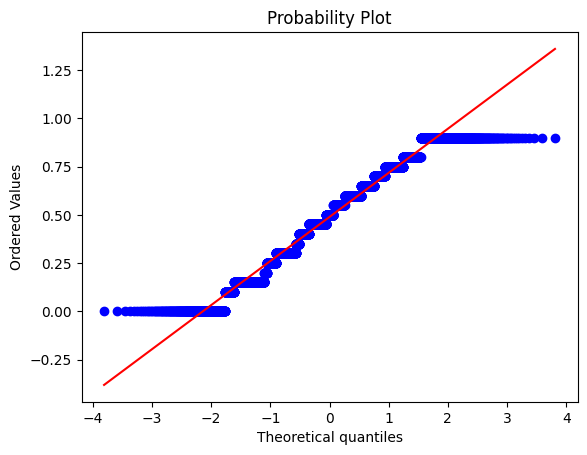

In [246]:
stats.probplot(df['diabetes_probability'], dist='norm', plot=plt)
plt.show()

## 4.4 Feature Simplification

- Deleting cholesterol and BMI category because there is a numeric value of both of them
- Deleting Systolic and Diastolic because we have blood pressure category instead

In [247]:
df.drop('cholesterol_category', axis=1, inplace=True)
df.drop('bmi_category', axis=1, inplace=True)
df.drop('systolic', axis=1, inplace=True)
df.drop('diastolic', axis=1, inplace=True)

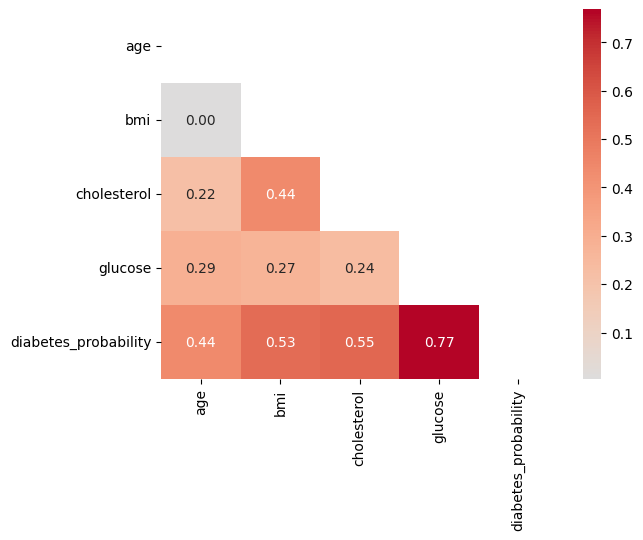

In [248]:
numerical_data = ['age', 'bmi', 'cholesterol', 'glucose', 'diabetes_probability']
correl = df[numerical_data].corr()
mask = np.triu(np.ones_like(correl, dtype=bool))
sns.heatmap(correl, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.show()

# 5. Define X and y

In [249]:
y = df['diabetes_probability']
X = df.drop('diabetes_probability', axis=1)

# 6. Data Splitting

In [250]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 7. Feature Engineering and Preprocessing

## 7.1 Separating Numerical and Categorical Features

In [251]:
categorical_features = ['gender', 'blood_pressure_category']
numerical_features = ['age', 'bmi', 'cholesterol', 'glucose']

## 7.2 Preproccessing and Transformer

In [252]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 8. Model Benchmarking

In [253]:
results = {}
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression()),
    ]),
    
    'Ridge Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=1.0, random_state=42))
    ]),
    
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor(n_neighbors=5))
    ]),
    
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
    ]),
    
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1))
    ]),
    
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    
    'AdaBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42))
    ]),
    
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0))
    ]),
    
    'LightGBM': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, verbose=-1))
    ]),
    
    'CatBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0, random_state=42))
    ])
}

In [254]:
def safe_mape(y_true, y_pred):
    mask = (y_true != 0)
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

In [255]:
for name, model in models.items():
    # Wrap with TransformedTargetRegressor for log transformation
    target_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)
    final_model = TransformedTargetRegressor(
        regressor=model,
        transformer=target_transformer
    )
    
    # 8d. TRAIN WITH TIMING
    start_time = time.time()
    final_model.fit(X_train, y_train)
    elapsed = time.time() - start_time
    
    # Predictions
    y_pred_train = final_model.predict(X_train)
    y_pred_test = final_model.predict(X_test)
    
    # Metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mape_test = safe_mape(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    results[name] = {
        'R2_Train': r2_train,
        'R2_Test': r2_test,
        'MAPE': mape_test,
        'MAE': mae_test,
        'RMSE': rmse_test,
        'Training_Time': elapsed,
        'Model': final_model
    }
    print(f"{name:20s} | R²_Train: {r2_train:.4f} | R²_Test: {r2_test:.4f} | MAPE: {mape_test:.4f} | Time: {elapsed:.2f}s")

Linear Regression    | R²_Train: 0.8776 | R²_Test: 0.8779 | MAPE: 0.1488 | Time: 0.02s
Ridge Regression     | R²_Train: 0.8776 | R²_Test: 0.8780 | MAPE: 0.1488 | Time: 0.02s
KNN                  | R²_Train: 0.9691 | R²_Test: 0.9499 | MAPE: 0.0916 | Time: 0.03s
Decision Tree        | R²_Train: 1.0000 | R²_Test: 0.9987 | MAPE: 0.0017 | Time: 0.03s
Random Forest        | R²_Train: 0.9999 | R²_Test: 0.9994 | MAPE: 0.0020 | Time: 0.46s
Gradient Boosting    | R²_Train: 0.9998 | R²_Test: 0.9997 | MAPE: 0.0045 | Time: 0.73s
AdaBoost             | R²_Train: 0.8780 | R²_Test: 0.8755 | MAPE: 0.1657 | Time: 0.48s
XGBoost              | R²_Train: 0.9999 | R²_Test: 0.9994 | MAPE: 0.0024 | Time: 0.11s
LightGBM             | R²_Train: 0.9998 | R²_Test: 0.9996 | MAPE: 0.0025 | Time: 0.10s
CatBoost             | R²_Train: 0.9994 | R²_Test: 0.9993 | MAPE: 0.0089 | Time: 0.38s


In [256]:
results_df = pd.DataFrame({
    'Model': results.keys(),
    'R2_Train': [v['R2_Train'] for v in results.values()],
    'R2_Test': [v['R2_Test'] for v in results.values()],
    'MAPE': [v['MAPE'] for v in results.values()],
    'MAE': [v['MAE'] for v in results.values()],
    'RMSE': [v['RMSE'] for v in results.values()],
    'Training_Time': [v['Training_Time'] for v in results.values()]
}).sort_values('R2_Test', ascending=False)

results_df

,Model,R2_Train,R2_Test,MAPE,MAE,RMSE,Training_Time
5,Gradient Boosting,0.999817,0.999699,0.004543,0.001843,0.003963,0.732072
8,LightGBM,0.999801,0.999627,0.002519,0.001049,0.004410,0.096897
7,XGBoost,0.999945,0.999412,0.002421,0.000922,0.005537,0.110605
4,Random Forest,0.999899,0.999363,0.002044,0.000791,0.005763,0.458728
9,CatBoost,0.999361,0.999285,0.008929,0.003475,0.006104,0.380880
3,Decision Tree,1.000000,0.998730,0.001743,0.000625,0.008139,0.027836
2,KNN,0.969099,0.949851,0.091588,0.034166,0.051137,0.034414
1,Ridge Regression,0.877567,0.877955,0.148760,0.062865,0.079775,0.021632
0,Linear Regression,0.877556,0.877921,0.148780,0.062878,0.079786,0.016820
6,AdaBoost,0.878047,0.875479,0.165719,0.067759,0.080580,0.479393


In [257]:
best_model_name = results_df.iloc[0]['Model']
print(f" Best Baseline Model: {best_model_name} (R²={results_df.iloc[0]['R2_Test']:.4f})")

 Best Baseline Model: Gradient Boosting (R²=0.9997)


# 9. Hyperparameter Tuning

In [260]:
hyperparams = {
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 150, 200],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__subsample': [0.7, 0.8, 0.9]
    }
}

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

gb_random = RandomizedSearchCV(
    gb_pipeline,
    hyperparams['Gradient Boosting'],
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42)

In [261]:
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...Regressor())])
,param_distributions,"{'regressor__learning_rate': [0.01, 0.05, ...], 'regressor__max_depth': [3, 5, ...], 'regressor__n_estimators': [50, 100, ...], 'regressor__subsample': [0.7, 0.8, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [262]:
print(f"Best parameters: {gb_random.best_params_}")
print(f"Best CV R² Score: {gb_random.best_score_:.4f}")

Best parameters: {'regressor__subsample': 0.9, 'regressor__n_estimators': 200, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
Best CV R² Score: 0.9998


In [263]:
best_tuned_model = gb_random.best_estimator_

y_pred_tuned = best_tuned_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mape_tuned = safe_mape(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\nTuned Model Performance on Test Set:")
print(f"  R² Score: {r2_tuned:.4f}")
print(f"  MAPE: {mape_tuned:.4f}")
print(f"  MAE: {mae_tuned:.4f}")
print(f"  RMSE: {rmse_tuned:.4f}")


Tuned Model Performance on Test Set:
  R² Score: 0.9999
  MAPE: 0.0012
  MAE: 0.0005
  RMSE: 0.0026


# 10. Model Validation and Residual Analysis

## 10.1 Residual Stats

In [264]:
final_model = best_tuned_model if 'best_tuned_model' in locals() else best_model_name

# Get predictions
y_train_pred_final = final_model.predict(X_train)
y_test_pred_final = final_model.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred_final
test_residuals = y_test - y_test_pred_final

print(f"\nResidual Statistics:")
print(f"Train Residuals - Mean: {train_residuals.mean():.6f}, Std: {train_residuals.std():.6f}")
print(f"Test Residuals - Mean: {test_residuals.mean():.6f}, Std: {test_residuals.std():.6f}")


Residual Statistics:
Train Residuals - Mean: 0.000000, Std: 0.000498
Test Residuals - Mean: 0.000088, Std: 0.002625


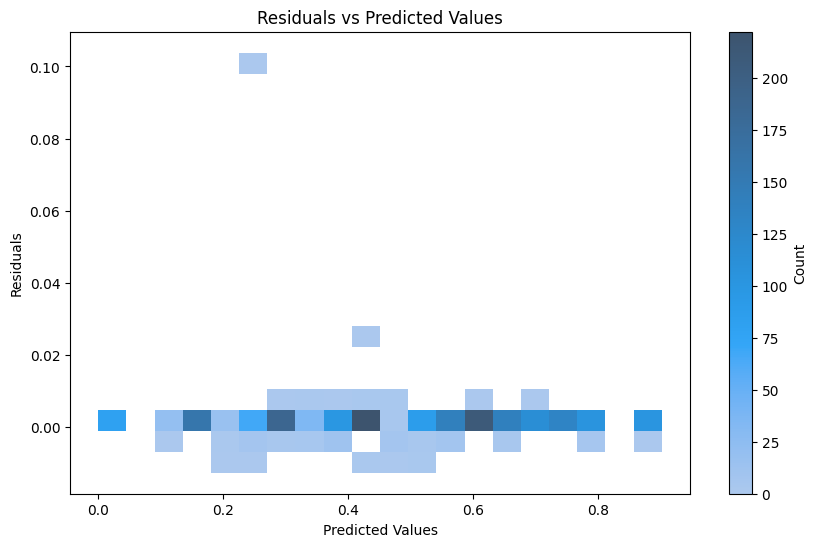

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(x=y_pred_tuned, y=test_residuals, bins=20, cbar=True, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## 10.2 Comprehensive Residual Plots

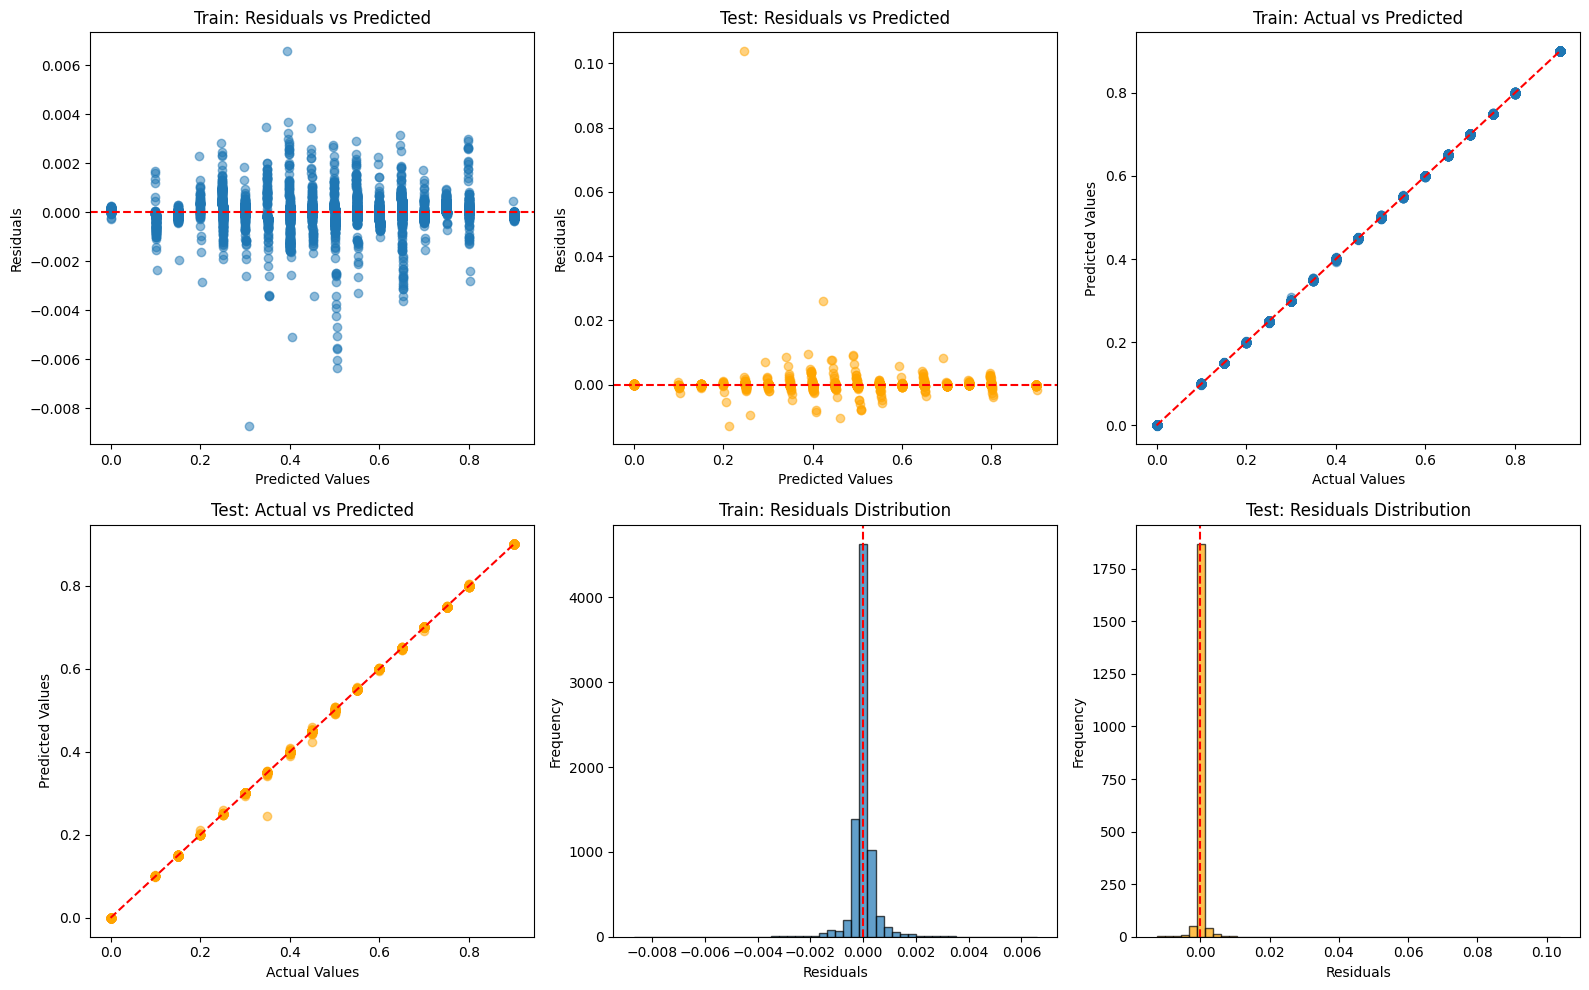

In [266]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Residuals vs Predicted (Train)
axes[0, 0].scatter(y_train_pred_final, train_residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Train: Residuals vs Predicted')

# 2. Residuals vs Predicted (Test)
axes[0, 1].scatter(y_test_pred_final, test_residuals, alpha=0.5, color='orange')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Test: Residuals vs Predicted')

# 3. Actual vs Predicted (Train)
axes[0, 2].scatter(y_train, y_train_pred_final, alpha=0.5)
axes[0, 2].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')
axes[0, 2].set_title('Train: Actual vs Predicted')

# 4. Actual vs Predicted (Test)
axes[1, 0].scatter(y_test, y_test_pred_final, alpha=0.5, color='orange')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title('Test: Actual vs Predicted')

# 5. Residuals Distribution (Train)
axes[1, 1].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Train: Residuals Distribution')

# 6. Residuals Distribution (Test)
axes[1, 2].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 2].axvline(x=0, color='r', linestyle='--')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Test: Residuals Distribution')

plt.tight_layout()
plt.show()

10.3 Q-Q Plot for Normality Check

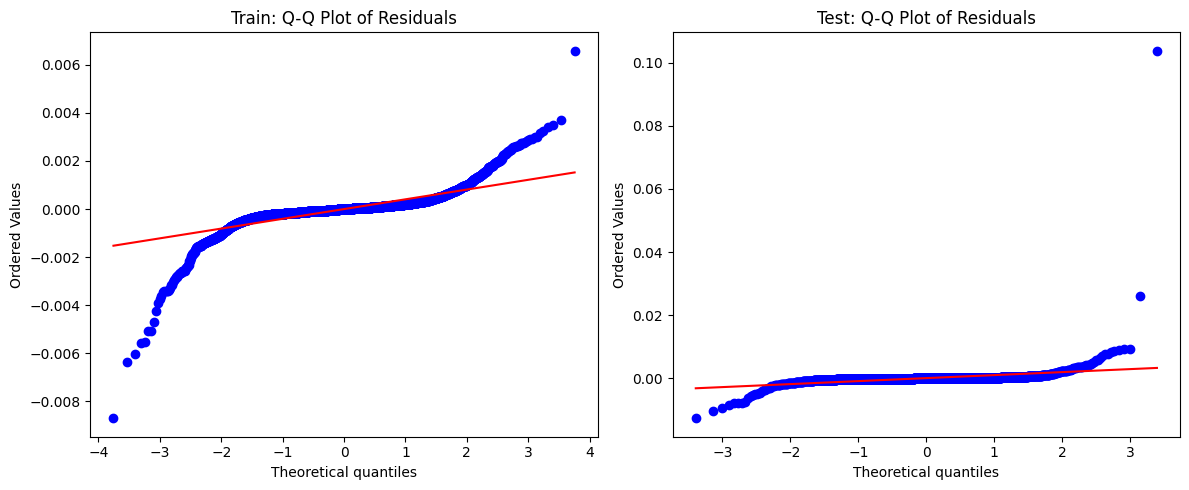

In [267]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
stats.probplot(train_residuals, dist="norm", plot=axes[0])
axes[0].set_title('Train: Q-Q Plot of Residuals')
stats.probplot(test_residuals, dist="norm", plot=axes[1])
axes[1].set_title('Test: Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# 11. Model Interpretability

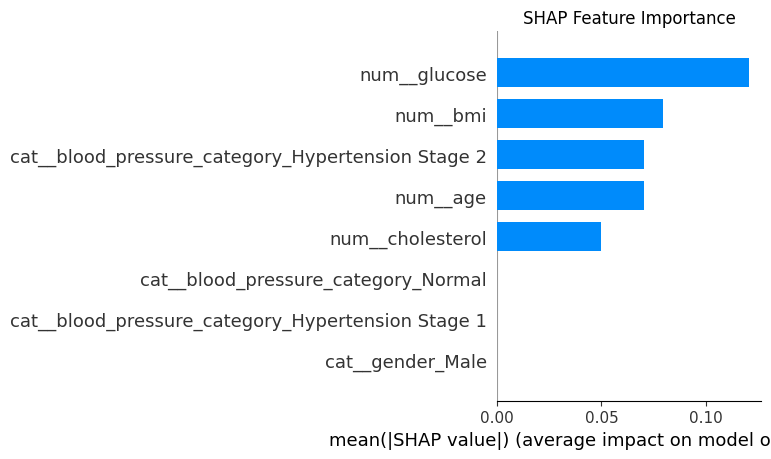

In [268]:
best_model = best_tuned_model.named_steps["regressor"]
X_test_trans = best_tuned_model.named_steps["preprocessor"].transform(X_test)
feature_names = best_tuned_model.named_steps["preprocessor"].get_feature_names_out()
X_test_shap = pd.DataFrame(X_test_trans, columns=feature_names)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_shap, check_additivity=False)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

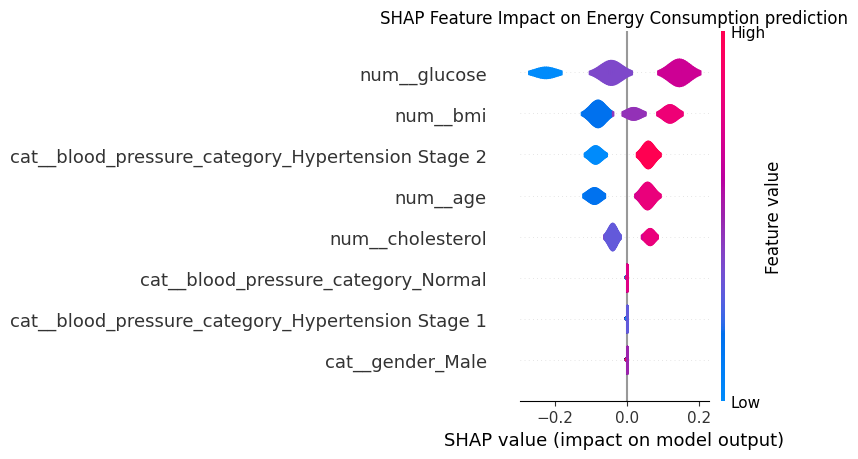

In [269]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap, plot_type="violin", show=False)
plt.title("SHAP Feature Impact on Energy Consumption prediction")
plt.tight_layout()
plt.show()

# 12. Conclusion and Recommendation

Final Model selected: **Gradient Boost with tuning**

with Performance Metrics:
- R² Score: 0.9999
- MAPE: 11071465439.7648
- MAE: 0.0005
- RMSE: 0.0024

`RECOMMENDATIONS FOR DATA:`
1. Collect more data on extreme cases (very high/low diabetes probability)
2. Include temporal data (patient history over time) for better predictions
3. Add lifestyle features (exercise, diet, smoking status) if available
4. Consider patient demographics (age groups, ethnic background)

`RECOMMENDATIONS FOR MODEL:`
1. Implement feature selection to reduce dimensionality
2. Experiment with ensemble methods combining multiple models
3. Consider class-balanced training for extreme probability values
4. Regular retraining with new data (quarterly recommended)
5. Monitor model drift in production

`RECOMMENDATIONS FOR BUSINESS:`
1. Deployment: Use in healthcare provider apps for risk screening
2. Maintenance Schedule: Retrain model every 3 months with new data
3. Usage: Real-time prediction for patient consultations
4. Thresholds: Define risk levels (Low <0.3, Medium 0.3-0.7, High >0.7)
5. Integration: API endpoint for EHR/clinical decision support systems
6. Monitoring: Track prediction accuracy vs actual outcomes

# 13. PICKLE

In [270]:
pickle.dump(best_tuned_model, open('best_diabetes_model.sav', 'wb'))

In [271]:
df.columns

Index(['age', 'gender', 'bmi', 'blood_pressure_category', 'cholesterol',
       'glucose', 'diabetes_probability'],
      dtype='object')

In [272]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [273]:
df['blood_pressure_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [274]:
model_filename = pickle.load(open('best_diabetes_model.sav', 'rb'))

# Make predictions on new data
new_data = pd.DataFrame({
    'age': [25],
    'gender': ['Male'],
    'bmi': [25.0],
    'blood_pressure_category': ['Normal'],
    'cholesterol': [200],
    'glucose': [100]
})

prediction = model_filename.predict(new_data)
print(f"Predicted diabetes probability: {prediction[0]:.4f}")

Predicted diabetes probability: 0.1525
